In [11]:
import numpy as np
from lattice_class import *
from hamiltonian_constructor_class import *
import scipy.linalg
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 150
plt.rcParams["savefig.dpi"] = 150

[140, 125, 110, 95]


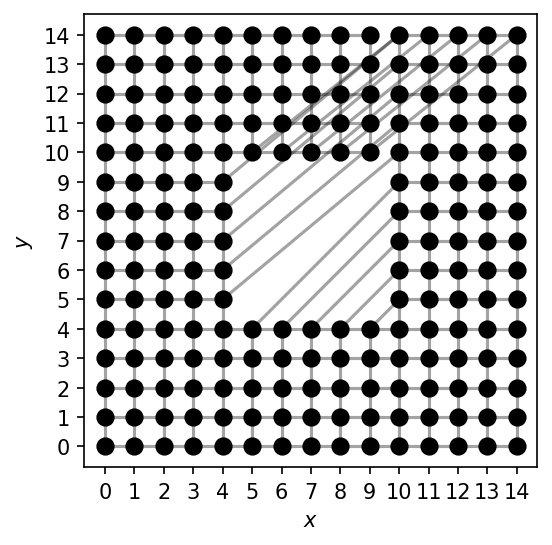

In [12]:
# Physical parameters
mu = 2.0
delta = complex(1.0, 0.0)
t = 1

N_hole = 5
N = 3 * N_hole
lattice = SquareLattice(N, BC="open")
middle_sites = [
    (N - N_hole) // 2 * N + (N - N_hole) // 2 + i * N + j
    for i in range(N_hole)
    for j in range(N_hole)
]

lattice.glue_bond(
    [2 * N_hole * N + N_hole + i for i in range(N_hole)],
    [N_hole * N + 2 * N_hole + i * N for i in range(N_hole)],
    (0, 2),
    codim=1,
)

lattice.glue_bond(
    [2 * N_hole * N + N_hole - 1 - (i + 1) * N for i in range(N_hole - 1)],
    [N_hole * N + 2 * N_hole - (i + 1) * N for i in range(N_hole - 1)],
    (1, 3),
    codim=1,
)

lattice.glue_bond([N_hole * N + N_hole - 1], [2 * N_hole], (1, 3), codim=1)
lattice.glue_bond([(N_hole - 1) * N + N_hole], [2 * N_hole], (2, 0), codim=1)
lattice.glue_bond(
    [(N_hole - 1) * N + N_hole + i + 1 for i in range(N_hole - 1)],
    [2 * N_hole + i + 1 for i in range(N_hole - 1)],
    (2, 0),
    codim=1,
)

lattice.remove_sites(middle_sites)
lattice.remove_bonds(
    [(2 * N_hole - 1 + i * N, 2 * N_hole + i * N) for i in range(N_hole)]
)

num_sites = lattice.get_num_sites()
lattice_sites = lattice.get_sites()

lattice.plot()
plt.savefig("./plots/volterra_dipole/4.svg")